<style>
    .golden-alert {
        background-color: gold;
        font-weight: bold;
    }
    .golden-alert h1, 
    .golden-alert h3 {
        font-weight: bold;
    }
</style>

<div class="alert alert-block alert-info golden-alert">
    <h1 align="center">SKLearn Nearest Neighbor</h1>
    <h3 align="center"> Machine Learning Course</h3>
</div>

#### Load Dependencies

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### Set Hyperparameters

In [5]:
PATH_DATA = "../data/"
n_neighbors = 9

#### Load Data

In [6]:
iris = pd.read_csv(PATH_DATA + "iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
x_iris = iris.drop(iris.species.name, axis=1)
y_iris = iris.species
print(x_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


#### Split Data to Train and Test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_iris,y_iris,
                                                    test_size=0.3,
                                                    random_state=101,
                                                    stratify=y_iris)

#### Train the Model

In [9]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [10]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

#### Evaluate the Model

In [11]:
knn.score(x_test, y_test)

0.9555555555555556

#### Predict

In [12]:
knn.predict([[3.1, 3.7, 2.4, 5.2]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

#### Visualize the Accuracy

In [13]:
max_neighbors = 30 
neighbors = np.arange(1, max_neighbors + 1)
train_accuracy = np.empty(max_neighbors)
test_accuracy = np.empty(max_neighbors)
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14096\196451537.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


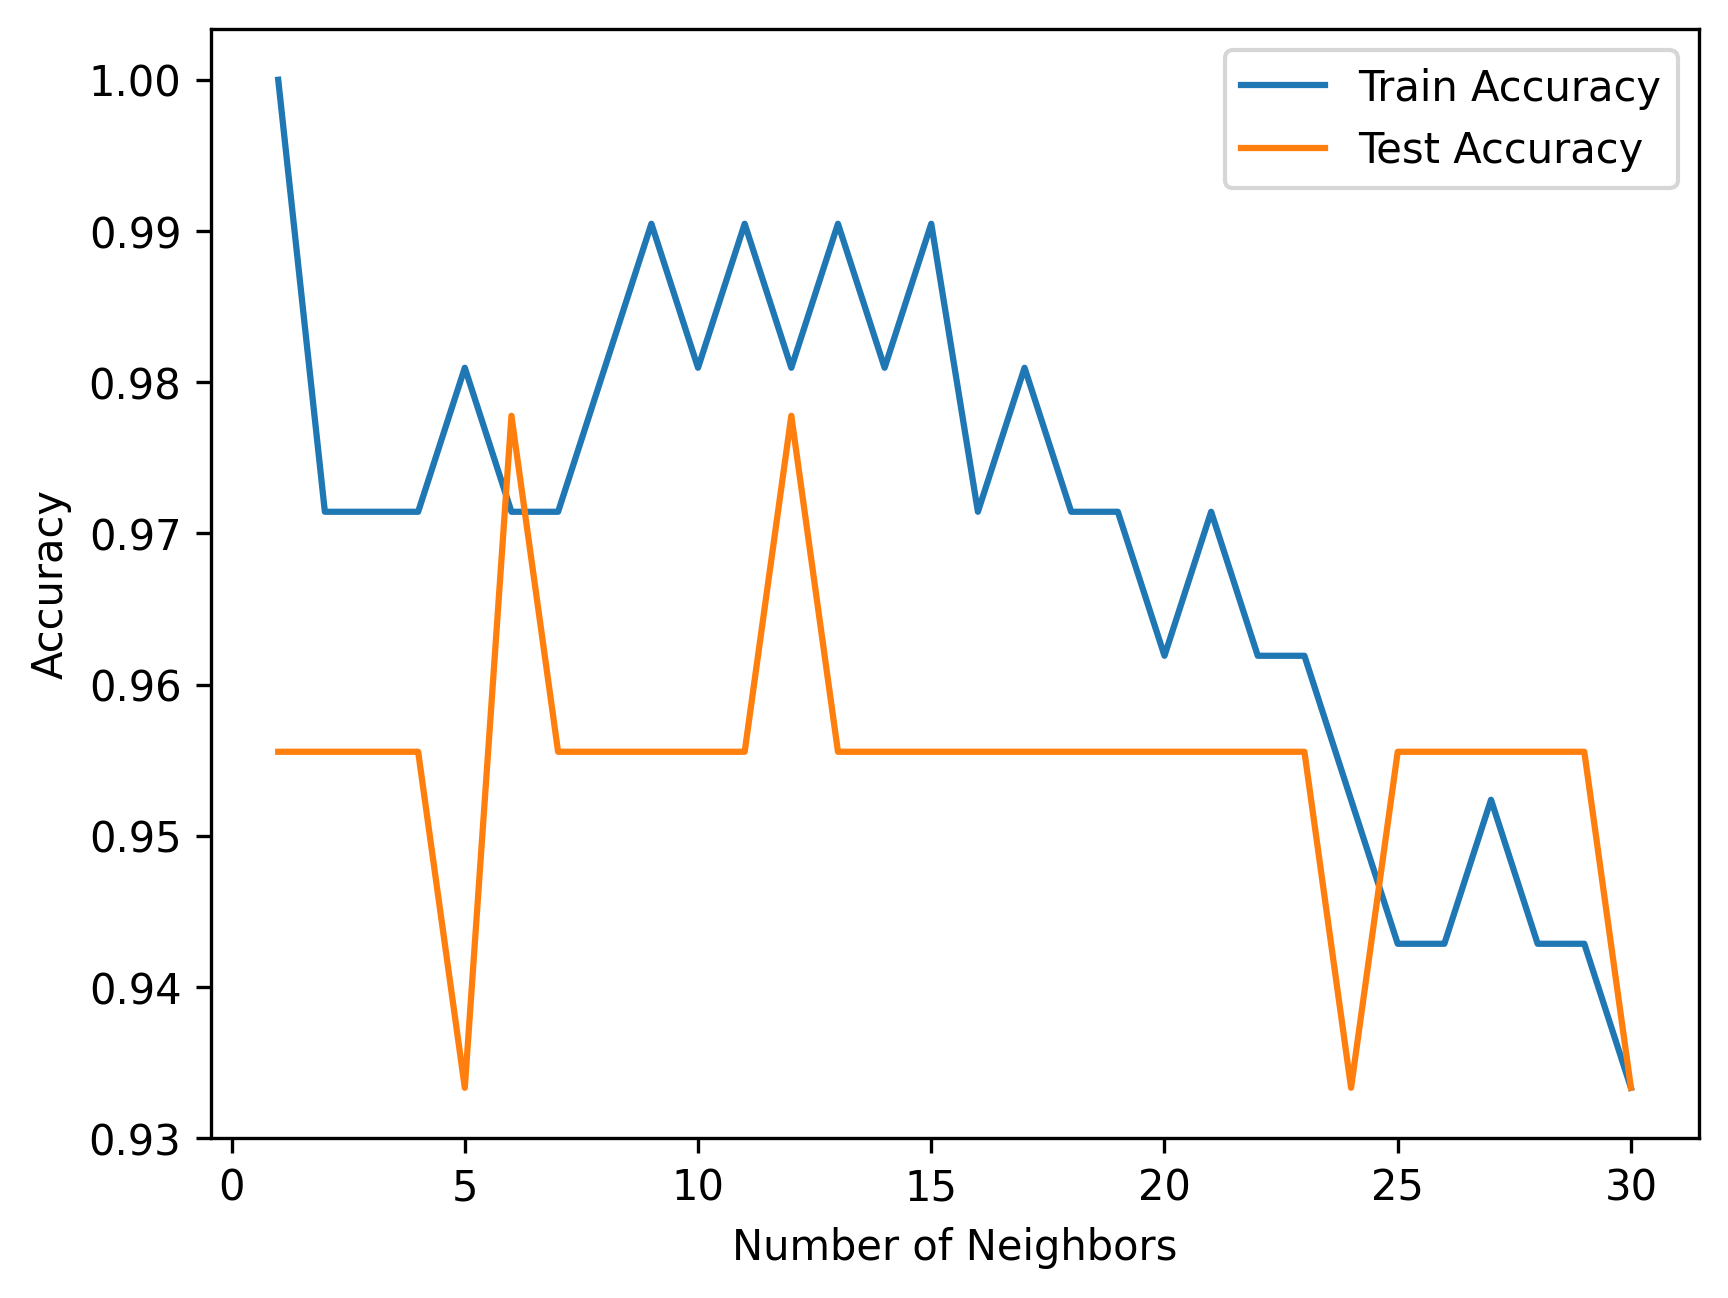

In [14]:
fig, ax = plt.subplots(dpi=300)
ax.plot(neighbors, train_accuracy, label="Train Accuracy")
ax.plot(neighbors, test_accuracy, label="Test Accuracy")
ax.legend()
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Accuracy")
fig.show()